<a href="https://colab.research.google.com/github/byakuya8/AI/blob/main/18_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

## 讀取mnist資料 
* x_train為60000筆訓練資料,每一筆資料為28x28的灰階手寫數字
* y_train為60000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)
* x_test為10000筆訓練資料,每一筆資料為28x28的灰階手寫數字
* y_test為10000筆資料的正確數字(0,1,2,3,4,5,6,7,8,9)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape={}, y_train.shape={}".format(x_train.shape, y_train.shape))
print("x_test.shape={}, y_test.shape={}".format(x_test.shape, y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape=(60000, 28, 28), y_train.shape=(60000,)
x_test.shape=(10000, 28, 28), y_test.shape=(10000,)


* 接著我們必須將x_train及x_test dataset由原本三維轉為四維矩陣以符合CNN的需求
* 這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。
* MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print("x_train.shape={}".format(x_train.shape))
print("x_test.shape={}".format(x_test.shape))

x_train.shape=(60000, 28, 28, 1)
x_test.shape=(10000, 28, 28, 1)


## 正規化(均質化)
* 接下來將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間）
* 可讓所有的特徵值介於0與1之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。

In [4]:
x_train = x_train / 255
x_test = x_test / 255

## One-Hot Encoding
* 手寫數字結果如果採用原來的1, 2, 3....在演算法中，會以為2是1的兩倍大，3是1的三倍大，其實並沒有這個意義
* 因此會採用One-Hot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。
* 舉例來說，原本y_train[0]=5，經過onehot encoding會變成[0,0,0,0,0,1,0,0,0,0]


In [5]:
y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)

## CNN模型建置
* filter代表過濾器的數量, kernel_size代表filter的大小
* padding: filter遇到邊緣的處理模式('same'為補0, 'valid'為忽略)

In [6]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(36, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()     

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 36)          14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

## 模型編譯
* loss:損失函數 
* optimizer:學習函數(梯度縮減的方式) 
* metrics:評估模型好壞的方式(accuracy=正確率)

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 模型訓練
* x:訓練資料 
* y:訓練資料的答案 
* validation_split:訓練資料的多少百分比要拿來驗證 
* validation_data:驗證資料 
* epochs:模型訓練次數 

In [8]:
train_history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Epoch 1/10
160/160 - 33s - loss: 0.5717 - accuracy: 0.8314 - val_loss: 0.1642 - val_accuracy: 0.9513
Epoch 2/10
160/160 - 1s - loss: 0.1699 - accuracy: 0.9498 - val_loss: 0.1042 - val_accuracy: 0.9692
Epoch 3/10
160/160 - 1s - loss: 0.1187 - accuracy: 0.9638 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 4/10
160/160 - 1s - loss: 0.0936 - accuracy: 0.9726 - val_loss: 0.0677 - val_accuracy: 0.9807
Epoch 5/10
160/160 - 1s - loss: 0.0814 - accuracy: 0.9745 - val_loss: 0.0606 - val_accuracy: 0.9827
Epoch 6/10
160/160 - 1s - loss: 0.0698 - accuracy: 0.9787 - val_loss: 0.0543 - val_accuracy: 0.9842
Epoch 7/10
160/160 - 1s - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 8/10
160/160 - 1s - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0474 - val_accuracy: 0.9853
Epoch 9/10
160/160 - 1s - loss: 0.0517 - accuracy: 0.9838 - val_loss: 0.0474 - val_accuracy: 0.9873
Epoch 10/10
160/160 - 1s - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0472 - val_accuracy: 0.986

## 模型評估

In [10]:
scores = model.evaluate(x_test, y_test)
print("模型正確率為：",scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0429 - accuracy: 0.9858
模型正確率為： 0.9883000254631042


## 繪製正確性與損失立歷史圖

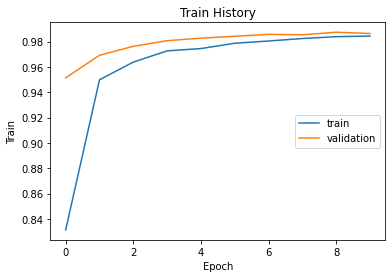

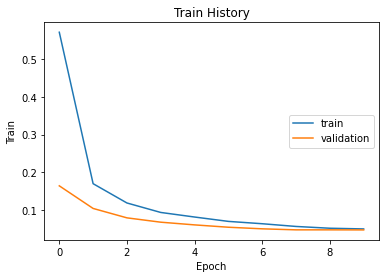

In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

## Confusion Matrix混淆矩陣

In [12]:

import pandas as pd
prediction = model.predict_classes(x_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,1,2,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,4,3,1014,0,3,0,0,6,2,0
3,1,0,1,995,0,6,0,4,2,1
4,1,0,0,0,975,0,2,0,1,3
5,2,0,0,4,0,883,1,1,0,1
6,4,3,2,0,3,2,944,0,0,0
7,0,4,3,0,0,0,0,1019,1,1
8,6,0,1,1,1,1,0,5,954,5
